In [114]:
# Importing necessary libraries & modules; checking system compatibility
import sys, pip 
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from streaming_func import clean_streaming_df, unique_actors_per_genre

In [115]:
# Loading Disney+ dataset & displaying basic info on the dataframe

DATA_DIR = Path(".")
disney_df = pd.read_csv(DATA_DIR / "disney_plus_titles.csv")

print(disney_df.head(), '\n')
print(disney_df.info())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, John Leguizamo, Denis L...  United States   
3  Darren Criss, Adam Lambert, Derek Hough

In [116]:
# Data cleaning function for Amazon Prime dataset for easier exploration & manipulation

test_disney_df = clean_streaming_df(disney_df)
print(test_disney_df.head(), '\n')
print(test_disney_df.info())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast          country  \
0  [Chris Diamantopoulos, Tony Anselmo, Tress Mac...               []   
1         [Jim Varney, Noelle Parker, Douglas Seale]               []   
2  [Raymond Albert Romano, John Leguizamo, Denis ...  [United States]   
3  [Darren Criss, Adam Lambert, De

In [117]:
# Extracting unique countries from the 'country' column for Amazon Prime dataset
disney_countries = test_disney_df["country"]

disney_countries_unique = []
for country_list in disney_countries:
    for country in country_list:
        if country not in disney_countries_unique:
            disney_countries_unique.append(country)

print(disney_countries_unique, '\n')
print(f'Total number unique countries for Disney media production: {len(disney_countries_unique)}')

['United States', 'Canada', 'Australia', 'United Kingdom', 'South Korea', 'Ireland', 'Denmark', 'Spain', 'Poland', 'Hungary', 'France', 'Japan', 'Germany', 'India', 'Singapore', 'Thailand', 'China', 'Brazil', 'Belgium', 'Austria', 'South Africa', 'Hong Kong', 'Argentina', 'United Arab Emirates', 'Mexico', 'Switzerland', 'Taiwan', 'Philippines', 'Tanzania', 'Panama', 'Angola', 'Botswana', 'Namibia', 'Luxembourg', 'Guatemala', 'Russia', 'Malaysia', 'Kazakhstan', 'Syria', 'Iran', 'Egypt', 'Pakistan', 'New Zealand', 'Norway', 'Sweden', 'Slovenia', 'Czech Republic'] 

Total number unique countries for Disney media production: 47


In [118]:
# Extracting unique media types from the 'listed_in' column to check for any anomalous genre types & entries
unique_disney_genre_types = disney_df.listed_in.unique()
unique_disney_media_types = disney_df.type.unique()

# Displaying unique media types in the Disney dataset
print(f'Unique media types in Disney+ dataset: {[type for type in unique_disney_media_types]} \n')

# Displaying unique media genre lists in the dataset for additional visual debugging & validation§ 
print(f"Unique Media genre lists in Disney+ dataset: \n{unique_disney_genre_types}")

Unique media types in Disney+ dataset: ['Movie', 'TV Show'] 

Unique Media genre lists in Disney+ dataset: 
['Animation, Family' 'Comedy' 'Animation, Comedy, Family' 'Musical'
 'Docuseries, Historical, Music' 'Biographical, Documentary'
 'Action-Adventure, Superhero' 'Docuseries, Reality, Survival'
 'Animals & Nature, Docuseries, Family' 'Comedy, Family, Musical'
 'Documentary' 'Comedy, Family, Music' 'Documentary, Family'
 'Action-Adventure, Animals & Nature, Docuseries' 'Animals & Nature'
 'Animation' 'Animation, Kids' 'Comedy, Coming of Age, Drama'
 'Comedy, Family, Fantasy' 'Animation, Comedy, Drama'
 'Animation, Family, Fantasy' 'Action-Adventure, Animation, Comedy'
 'Comedy, Family' 'Action-Adventure, Comedy, Family' 'Lifestyle' 'Movies'
 'Action-Adventure, Science Fiction'
 'Action-Adventure, Fantasy, Superhero' 'Coming of Age, Music'
 'Animation, Drama' 'Concert Film, Music'
 'Animation, Comedy, Coming of Age' 'Animation, Comedy'
 'Animation, Crime, Family' 'Science Fiction' 'A

In [119]:
# Movies-only DataFrame
test_movies_df = test_disney_df[test_disney_df["type"] == "Movie"].copy()

# TV-Shows-only DataFrame
test_tv_shows_df = test_disney_df[test_disney_df["type"] == "TV Show"].copy()

print("Number of Movies @ Disney+:", len(test_movies_df))
print("Number of TV Shows @ Disney+:", len(test_tv_shows_df))

Number of Movies @ Disney+: 1052
Number of TV Shows @ Disney+: 398


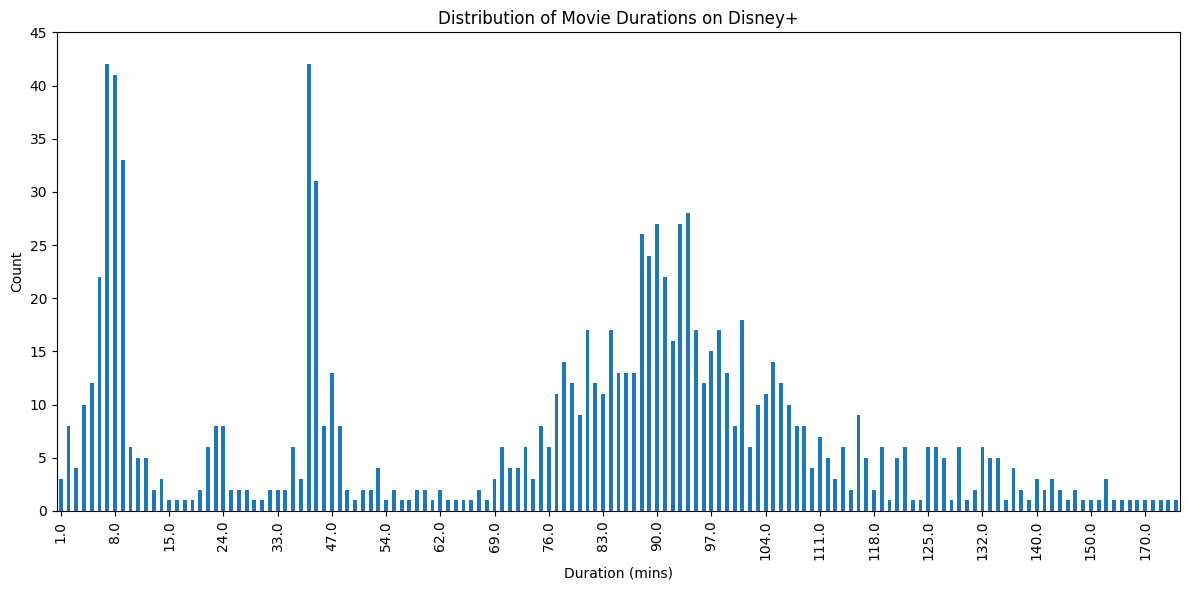

In [120]:
# Movies duration distribution plot
movies_ax = test_movies_df.groupby("duration_mins").size().plot(kind="bar", figsize=(12,6))

# Adjusting x & y ticks for better readability due to unexpected large number of unique duration values
movies_ax.set_yticks(movies_ax.get_yticks()[::len(movies_ax.get_yticks()) // 6])
movies_ax.set_xticks(movies_ax.get_xticks()[::len(movies_ax.get_xticks()) // 20])

movies_ax.set_title("Distribution of Movie Durations on Disney+")
movies_ax.set_xlabel("Duration (mins)")
movies_ax.set_ylabel("Count")
plt.tight_layout()
plt.show()

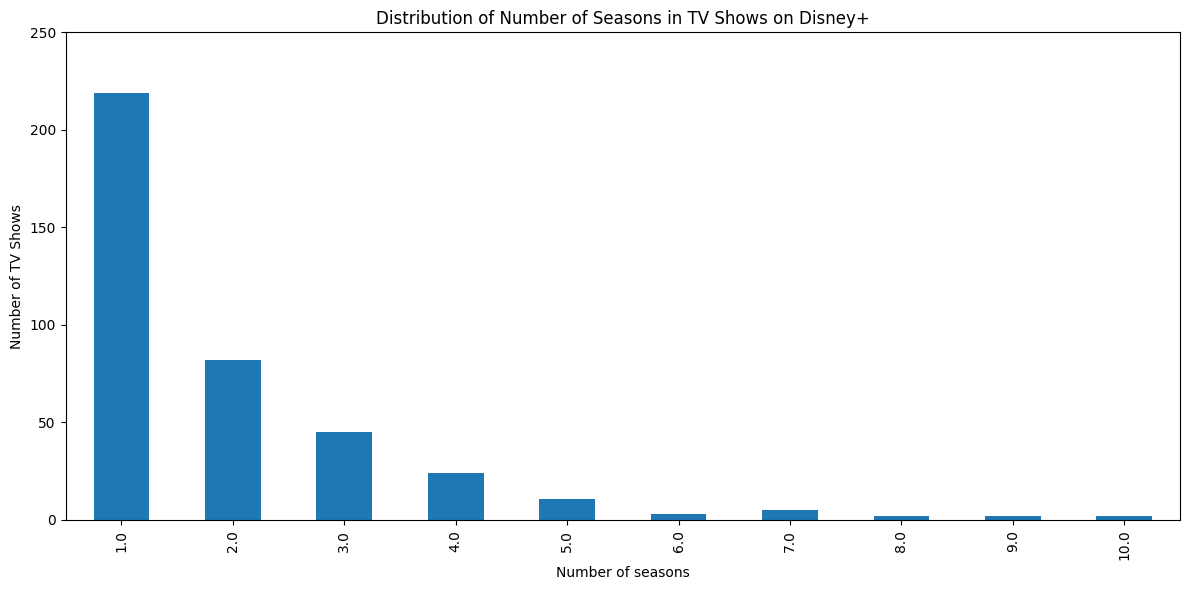

In [121]:
# Filtering for TV shows with 10 seasons or less, to avoid skewing the distribution plot

'''
Having gone through the unique genre types and entries in the dataset, it's clear that there are no anomalous entries in the 'duration_seasons' column for TV Shows.
Thus, we can proceed to filter the DataFrame based on the number of seasons for better visualization, as few shows have a high number of seasons (e.g., 10+), which skews the distribution plot.
'''

filtered_tv = test_tv_shows_df[test_tv_shows_df["duration_seasons"] <= 10]
shows_ax = filtered_tv.groupby("duration_seasons").size().plot(kind="bar", figsize=(12,6))

# Adjusting y ticks for better readability
shows_ax.set_yticks(shows_ax.get_yticks()[::len(shows_ax.get_yticks()) // 6])

shows_ax.set_xlabel("Number of seasons")
shows_ax.set_ylabel("Number of TV Shows")
shows_ax.set_title("Distribution of Number of Seasons in TV Shows on Disney+")
plt.tight_layout()
plt.show()

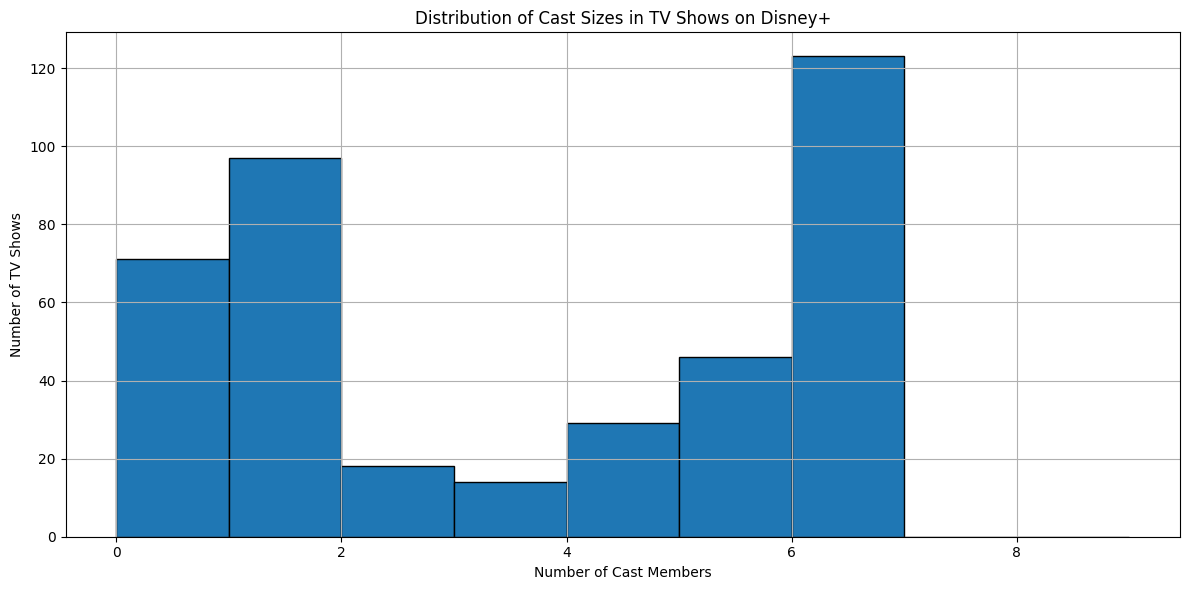

In [122]:
test_tv_shows_df["cast_count"] = test_tv_shows_df["cast"].apply(len)

''' 
Filtering for 10 cast members or less for better visualization, 
as it's shown most of publicly acknowledged shows have at least few cast members
'''

test_tv_shows_df["cast_count"].hist(bins=range(0, 10), edgecolor='black', figsize=(12,6))
plt.xlabel("Number of Cast Members")
plt.ylabel("Number of TV Shows")
plt.title("Distribution of Cast Sizes in TV Shows on Disney+")
plt.tight_layout()
plt.show()

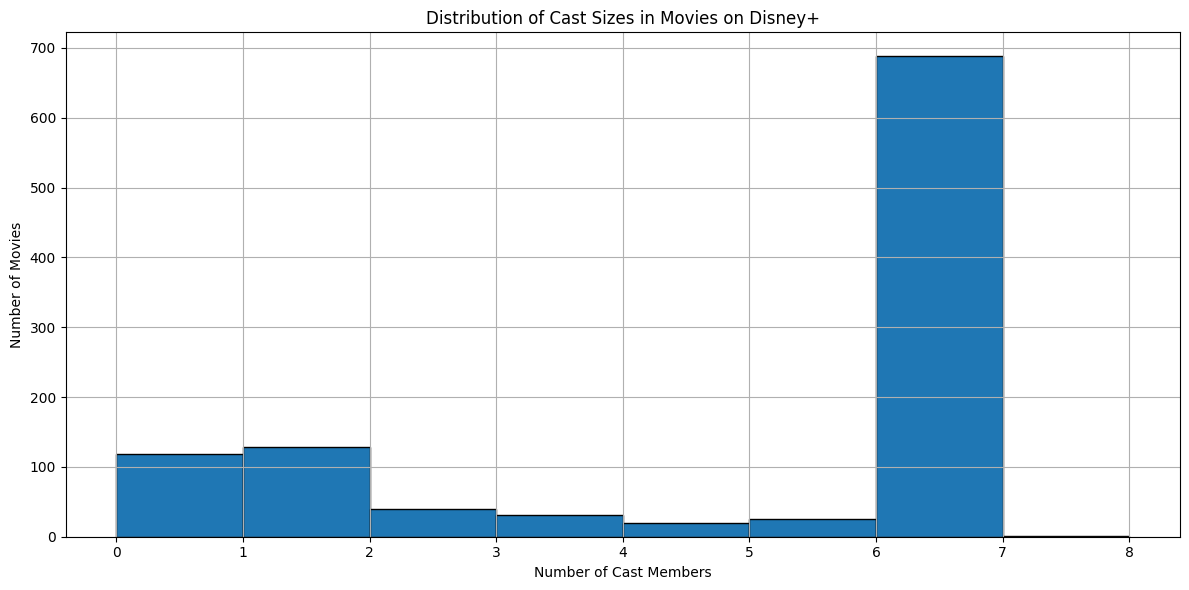

In [123]:
# Movies cast size distribution; adding 'cast_count' column to movies DataFrame to facilitate plotting of additioanl insights

test_movies_df["cast_count"] = test_movies_df["cast"].apply(len)
test_movies_df["cast_count"].hist(bins=range(0, 9), edgecolor='black', figsize=(12,6))
plt.xlabel("Number of Cast Members")
plt.ylabel("Number of Movies")
plt.title("Distribution of Cast Sizes in Movies on Disney+")
plt.tight_layout()
plt.show()

In [124]:
disney_media = disney_df.listed_in

disney_genres = []
for film in disney_media:
    for genre in film.split(', '):
        if genre not in disney_genres:
            disney_genres.append(genre)
print(f'List of unique Disney+ media genres: {disney_genres}')
print(f'Number of unique media genres in Disney+ dataset: {len(disney_genres)}')

List of unique Disney+ media genres: ['Animation', 'Family', 'Comedy', 'Musical', 'Docuseries', 'Historical', 'Music', 'Biographical', 'Documentary', 'Action-Adventure', 'Superhero', 'Reality', 'Survival', 'Animals & Nature', 'Kids', 'Coming of Age', 'Drama', 'Fantasy', 'Lifestyle', 'Movies', 'Science Fiction', 'Concert Film', 'Crime', 'Sports', 'Anthology', 'Medical', 'Variety', 'Spy/Espionage', 'Buddy', 'Parody', 'Game Show / Competition', 'Romance', 'Anime', 'Romantic Comedy', 'Thriller', 'Police/Cop', 'Talk Show', 'Western', 'Dance', 'Series', 'Mystery', 'Soap Opera / Melodrama', 'Disaster', 'Travel']
Number of unique media genres in Disney+ dataset: 44


In [125]:
# Extract unique cast members from the Disney+ dataset & add to a set
disney_unique_cast_members = set()

for cast_entry in disney_df["cast"]:

    # Skip NaN or missing values
    if not isinstance(cast_entry, str):
        continue

    # Split by comma
    for actor in cast_entry.split(","):
        actor = actor.strip()
        if actor:  # skip empty strings
            disney_unique_cast_members.add(actor)

# Convert the set to a list for easier handling
disney_unique_cast_members = list(disney_unique_cast_members)

print(f"Sample of 'disney_unique_cast_members' list for inspection: \n{disney_unique_cast_members[:10]}\n")
print(f'Number of unique cast members in Disney+ dataset: {len(disney_unique_cast_members)}')

Sample of 'disney_unique_cast_members' list for inspection: 
['Sahar Biniaz', 'Lester Speight', 'Sam Horrigan', 'Timothy Omundson', 'Geoffrey Keen', 'Cameron Boyce', 'Cara DeLizia', 'Samantha Morton', 'Elias Koteas', 'Susan Egan']

Number of unique cast members in Disney+ dataset: 3754


In [126]:
# Explode Disney+ movie genres into separate rows
movies_df_exploded = test_movies_df.explode("listed_in").copy()

# Adding cast count column to the exploded dataframe
movies_df_exploded["cast_count"] = movies_df_exploded["cast"].str.len()

# Removing empty genres that become NaN after explode, before the groupby
movies_df_exploded = movies_df_exploded[movies_df_exploded["listed_in"].notna()]

# Total number of role appearances in each genre (counting a movie once per genre)
movie_genre_cast_counts = movies_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(f'Number of role appearances on Disney+ media by genre: \n{movie_genre_cast_counts}')

Number of role appearances on Disney+ media by genre: 
listed_in
Family              2215
Comedy              2014
Action-Adventure    1807
Animation           1500
Coming of Age        907
Fantasy              853
Drama                689
Science Fiction      434
Animals & Nature     342
Documentary          306
Musical              208
Sports               189
Biographical         181
Music                181
Kids                 157
Buddy                128
Historical           108
Romance              106
Superhero             96
Crime                 82
Mystery               48
Concert Film          37
Anthology             36
Western               27
Variety               25
Thriller              24
Dance                 19
Parody                17
Survival              13
Romantic Comedy       12
Disaster              12
Spy/Espionage         12
Reality                8
Medical                8
Movies                 5
Lifestyle              5
Name: cast_count, dtype: int64


In [127]:
## Disney+ TV-shows & Movies unique actors per genre count

movie_unique_actors_per_genre = unique_actors_per_genre(test_movies_df)
tv_unique_actors_per_genre = unique_actors_per_genre(test_tv_shows_df)

# Answers how many for each movie & tv-show genre on Disney+, how many distinct actors have appeared in at least one movie of that genre
print(f'Number of unique actors per movie genre on Disney+: {len(movie_unique_actors_per_genre)}')
print(f'Number of unique actors per tv-show genre on Disney+: {len(tv_unique_actors_per_genre)}')

Number of unique actors per movie genre on Disney+: 36
Number of unique actors per tv-show genre on Disney+: 35


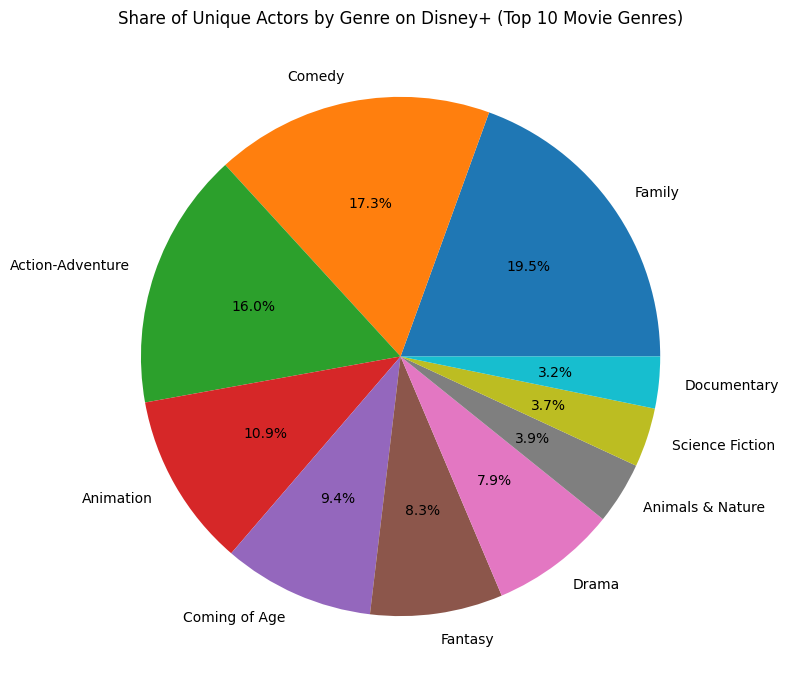

In [128]:
# Pie chart of unique actors per movie genre (top 10 genres only)

top_n = 10
top_genres = movie_unique_actors_per_genre.head(top_n)

plt.figure(figsize=(8, 8))
top_genres.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")  # hide y-label
plt.title("Share of Unique Actors by Genre on Disney+ (Top 10 Movie Genres)")
plt.tight_layout()
plt.show()

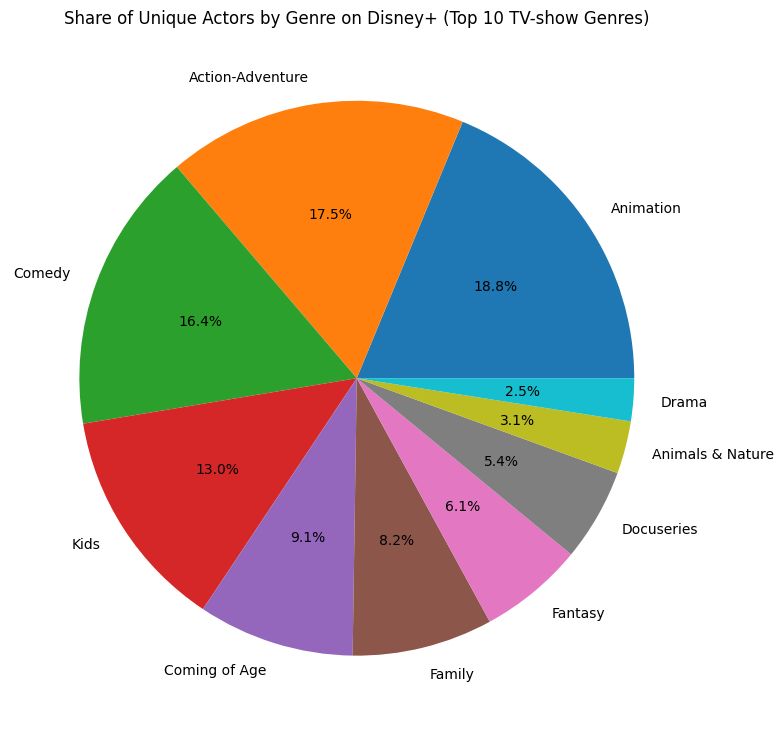

In [129]:
# Pie chart of unique actors per TV-show genre (top 10 genres only)

top_n = 10
top_genres = tv_unique_actors_per_genre.head(top_n)

plt.figure(figsize=(8, 8))
top_genres.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")  # hide y-label
plt.title("Share of Unique Actors by Genre on Disney+ (Top 10 TV-show Genres)")
plt.tight_layout()
plt.show()

In [130]:
# explode Disney+ tv shows genres into separate rows
shows_df_exploded = test_tv_shows_df.explode("listed_in")
shows_df_exploded["cast_count"] = shows_df_exploded["cast"].apply(len)

# Sorted tv show genre cast counts by ascending order to identify genres with largest casts
show_genre_cast_counts = shows_df_exploded.groupby("listed_in")["cast_count"].sum().sort_values(ascending=False)
print(f'Number of role appearances on Disney+ TV-shows by genres: \n{show_genre_cast_counts}')

Number of role appearances on Disney+ TV-shows by genres: 
listed_in
Animation                  643
Action-Adventure           539
Comedy                     517
Kids                       413
Coming of Age              261
Family                     228
Fantasy                    168
Docuseries                 150
Animals & Nature            89
Drama                       70
Buddy                       59
Science Fiction             52
Music                       35
Reality                     34
Historical                  28
Mystery                     24
Anthology                   23
Anime                       18
Musical                     17
Sports                      16
Survival                    13
Superhero                   13
Series                      12
Soap Opera / Melodrama      12
Game Show / Competition     11
Medical                     11
Lifestyle                   10
Variety                     10
Western                      7
Romance                      6
S

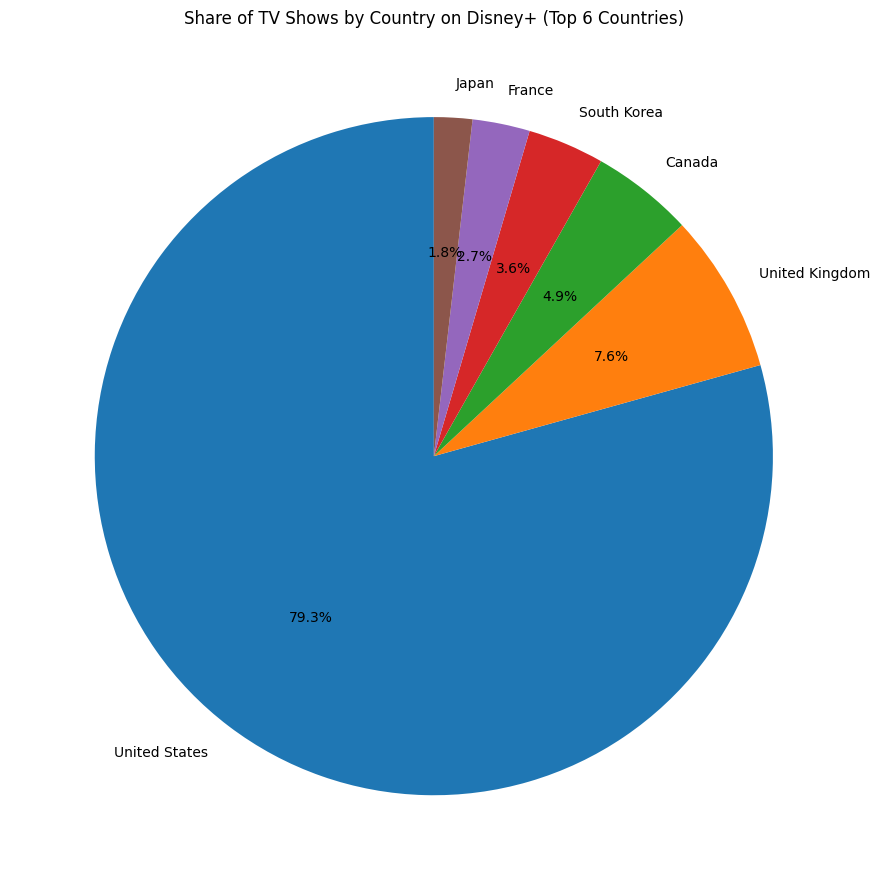

In [131]:
# Pie chart of unique countries where TV-shows are made per tv-show genre (top 10 countries only)

top_n = 6

# Explode list-of-countries into one country per row
show_countries = test_tv_shows_df["country"].explode()

# As a precaution, drop any 'empties' / 'missing' values present in the 'country' column
show_countries = show_countries.dropna()
show_countries = show_countries[show_countries != ""]   # remove empty strings
# (after explode, rows that were [] become NaN & get dropped)

'''
Due to the fact that Disney+ has a more limited selection of TV shows compared to other streaming platforms & is far younger than them,
we can only show a limited number of countries in a pie chart, so we pick top_n of 6 in order to have a readable chart.
'''

top_show_countries = show_countries.value_counts().head(top_n)

plt.figure(figsize=(14, 9))
top_show_countries.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Share of TV Shows by Country on Disney+ (Top 6 Countries)")
plt.tight_layout()
plt.show()

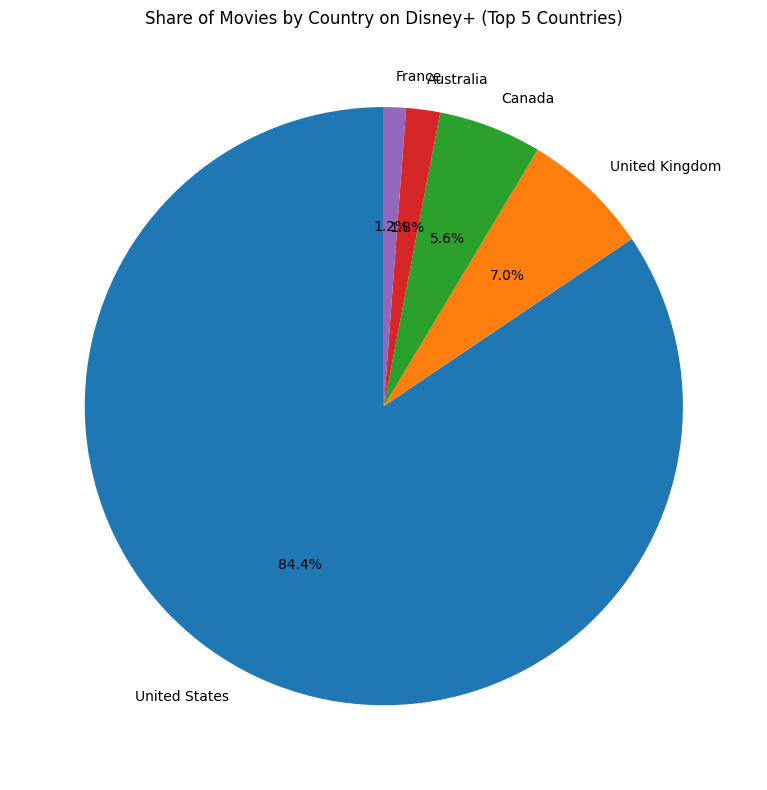

In [132]:
# Pie chart of unique countries where movies are produced per movie genre

top_n = 5  # limited to 8 for readability of pie chart

# Explode list-of-countries into one country per row
movie_countries = test_movies_df["country"].explode()

# As a precaution, drop any 'empties' / 'missing' values present in the 'country' column
movie_countries = movie_countries.dropna()
movie_countries = movie_countries[movie_countries != ""]          # just in case
# (after explode, rows that were [] become NaN & get dropped)

'''
Once again, due to the limited selection of movies on Disney+, we can only show a more limited number of countries in the pie chart for movies,
so we pick top_n of 5 in order to have a readable chart. Though there are more countries in the dataset, 
the pie chart would become unreadable with too many slices, due to shares taken by 'other' countries 
that are more popular to film & produce media in than the rest.
'''

top_movie_countries = movie_countries.value_counts().head(top_n)

plt.figure(figsize=(12, 8))
top_movie_countries.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.ylabel("")
plt.title("Share of Movies by Country on Disney+ (Top 5 Countries)")
plt.tight_layout()
plt.show()

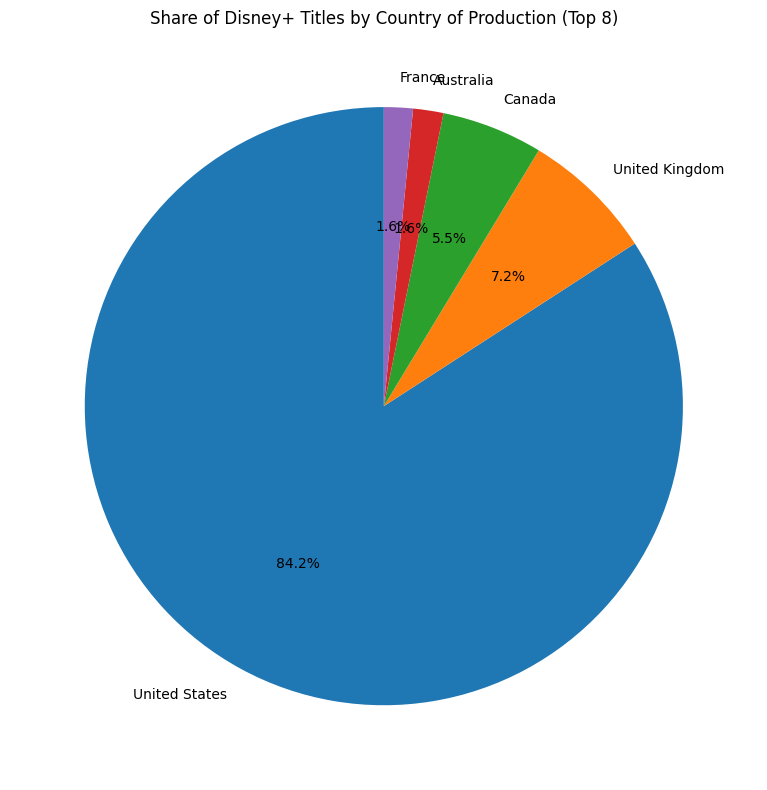

In [133]:
# Pie chart showing the share of Disney+ titles by country of production

top_n = 5  # limited to 7 for readability of pie chart

# Explode converts each list into separate rows so each country is counted individually
media_countries = test_disney_df["country"].explode()

# As a precaution, remove missing or empty entries that result from empty lists
media_countries = media_countries.dropna()
media_countries = media_countries[media_countries != ""]   # extra safeguard

# Count how many titles are associated with each country
top_media_countries = media_countries.value_counts().head(top_n)

'''
Due to the significantly smaller dataset of Disney+ titles compared to other streaming platforms, 
due to its relatively recent launch & more limited global reach as a streaming service (whilst predominantly being focused on US market),
we can only show a limited number of countries in the pie chart, so we pick top_n of 5 in order to have a somewhat readable chart
that still captures the main production countries for Disney+ titles.
'''

# Plot pie chart
plt.figure(figsize=(12, 8))
top_media_countries.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90
)
plt.ylabel("")  # hide default y-axis label
plt.title("Share of Disney+ Titles by Country of Production (Top 8)")
plt.tight_layout()
plt.show()